<a href="https://colab.research.google.com/github/hgmhd7/AI-Machine-Learning/blob/main/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color: green; text-align: center; font-weight: bold;">Post class assignment</h2>

# Introduction

#### XYZ Bank - Term Deposit Subscription Prediction
* You are a data scientist at XYZ Bank, tasked with helping the bank increase the success rate of its term deposit campaigns. In the previous campaigns, the bank noticed that only a small fraction of customers subscribed to term deposits, and now they want to use data science to predict which customers are likely to subscribe.

<center><img src="https://dcbtehri.co.in/wp-content/uploads/2020/05/FD1.jpg"/></center>

* You’ve been provided with a dataset that includes information about customer demographics, financial behavior, and previous campaign contact history. Your task is to evaluate different machine learning models and help the bank efficiently target potential customers for their term deposit marketing efforts.

# Step 1: Import the neccessary libraries

In [ ]:
# Import the necessary libraries(numpy, pandas, matplotlib, seaborn)
# Data manipulation and numerical operations

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# Step 2: Load the data


### The dataset contains 16 features and a target as shown below:
1. `age`: The customer's age.
2. `job`: The type of job the customer has.
3. `marital`: The marital status of the customer.
4. `education`: The customer's level of education.
5. `default`: Whether the customer has credit in default.
6. `balance`: The average yearly balance in euros.
7. `housing`: Whether the customer has a housing loan.
8. `loan`: Whether the customer has a personal loan.
9. `contact`: The type of communication contact
10. `day`: The last contact day of the month.
11. `month`: The last contact month of the year.
12. `duration`: The last contact duration in seconds.
13. `campaign`: Number of contacts performed during this campaign.
14. `pdays`: Number of days since the client was last contacted.
15. `previous`: Number of contacts before this campaign.
16. `poutcome`: Outcome of the previous marketing campaign.
17. `y`: Whether the customer subscribed to the term deposit (yes/no).


### 2.1 Load the data & view it


Hint: Use ; as the seperator.

In [ ]:
# mount the Google Drive to get the bank data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
# Read the csv file using a seperator ";"
df = pd.read_csv('/content/drive/MyDrive/model_evaluation_and_tuning/bank-full.csv', sep=';')

# Viewing the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.2 View the columns of the data and understand them

In [ ]:
# View the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [ ]:
# Checking the shape of the data
df.shape

(45211, 17)

### 2.4 Understand the datatypes of each of the columns

In [ ]:
# Check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 2.5 Get a summary of the dataset using the describe method.

In [ ]:
# Get a statistical summary of the dataset
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# STEP 3: EDA



### 3.1  Check the value counts of the target variable y in the dataset

A common problem in binary classification tasks is data imbalance, where one class significantly outnumbers the other. In this question, you need to check whether the target variable y (whether the customer subscribed to a term deposit) is imbalanced in the dataset.

In [ ]:
# Check the value counts in target column
df.y.value_counts(normalize=True)

,proportion
y,
no,0.883015
yes,0.116985


### 3.2 Plot the distribution of the value counts for the target variable y

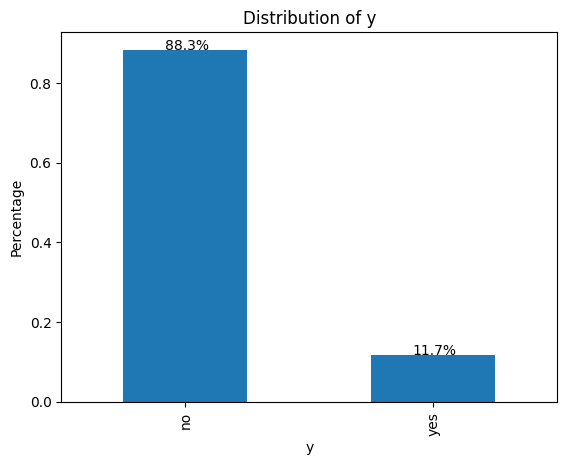

In [ ]:
# Get the value counts of 'y'
df.y.value_counts(normalize=True).plot(kind='bar')

# Define ax for the percentage patches
ax = plt.gca()

# Add percentages to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%', (p.get_x() + p.get_width() / 3, p.get_height()))

# Add titles to axis
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Percentage')

# Plot the distribution
plt.show()

### 3.3 Plot a pie chart to visualize the distribution of the target variable y, including the percentages of each category

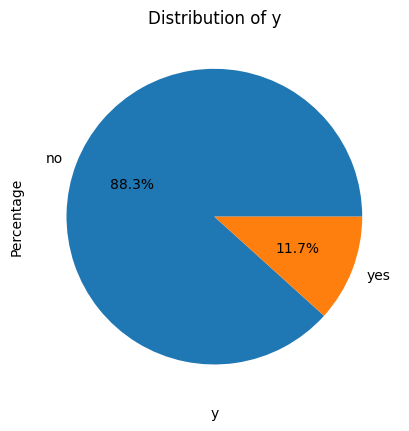

In [ ]:
# Get the value counts of 'y'
df.y.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

# Add titles to axis
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Percentage')

# Create a pie chart
plt.show()

### 3.4 Why do you think classs imabalnce is a problem, and list down your ideas on addressing the class imbalance?

In [ ]:
"""
This Class Imbalance is a a BIG problem for the dataset asw it will assign a much higher magnitude of importance to the No attribute than the Yes attribute
for the Y feature.  In practice, this means that we will have model that is highly tuned toward predicting clients that will not subscribe to a term deposits
vs clients that will.  This is the opposite of what we are tying to predict for.  I do wonder, however, since this is a BINARY target, if we predict who will
likely NOT subscribe to a high level of accuracy, couldnt we just use customers who fall outside of that prediction in the campain?  That is, if I was to
proced with the imbalanced dataset.

Furthermore, some solutions for this imbalance are SMOTE (Synthetic Minority Oversampling Technique) or usengthe class_mbalance = 'balanced' hyperparameter
option before model training.  SMOTE would potentiall make the data LESS INTERPRETABLE since it adds Synthetic samples to the actual data before model training.
class_balance = 'balanced' would leave our data more interpretable since it doesnt add any synthetic data, rather it has the model assigh higher weights to
the minority attribute than the majority attribute of the Target variable.

"""

"\nThis Class Imbalance is a a BIG problem for the dataset asw it will assign a much higher magnitude of importance to the No attribute than the Yes attribute\nfor the Y feature.  In practice, this means that we will have model that is highly tuned toward predicting clients that will not subscribe to a term deposits\nvs clients that will.  This is the opposite of what we are tying to predict for.  I do wonder, however, since this is a BINARY target, if we predict who will\nlikely NOT subscribe to a high level of accuracy, couldnt we just use customers who fall outside of that prediction in the campain?  That is, if I was to\nproced with the imbalanced dataset.\n\nFurthermore, some solutions for this imbalance are SMOTE (Synthetic Minority Oversampling Technique) or usengthe class_mbalance = 'balanced' hyperparameter\noption before model training.  SMOTE would potentiall make the data LESS INTERPRETABLE since it adds Synthetic samples to the actual data before model training.\nclass_bal

### 3.5 For this problem what do you think is a good performance metric, precision, recall, f1-score or all of them? justify your answer.

In [ ]:
"""

For this problem, I place a higher importance on RECALL since we dont want to miss potentail customer opportunities.  This is more important that Preventing
False Positives by being Precision focused because, while there may be sunken cost involved in adding unlikely clientel to a campain, the potential revene in
perpetuity from aquring new clientele should reasonably outpace whatever campain cost are involved for  periodic campains.

"""

'\n\nFor this problem, I place a higher importance on RECALL since we dont want to miss potentail customer opportunities.  This is more important that Preventing\nFalse Positives by being Precision focused because, while there may be sunken cost involved in adding unlikely clientel to a campain, the potential revene in\nperpetuity from aquring new clientele should reasonably outpace whatever campain cost are involved for  periodic campains.\n\n'

# Step 4:  Data Preprocessing

### 4.1 Check for any duplicate rows in the dataset.

In [ ]:
# Check for duplicate row
df.duplicated().sum()

np.int64(0)

### 4.2 Check the Null values


In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


### 4.3 Split the data into train and test

In [ ]:
# Assuming X and y are your features and target variable
# Split the data into 80% train and 20% test, stratifying by the target variable (y)
X = df.drop('y', axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 4.4 Seperate the numerical and catergorical columns for both train and test sets

In [ ]:
# Divide the dataset into numerical and categorical columns
numerical_columns = df.select_dtypes(include = 'number')
categorical_columns = df.select_dtypes(include = 'object')

# Separate numerical and categorical columns for train and test data
train_numerical = X_train.select_dtypes(include = 'number')
test_numerical =  X_test.select_dtypes(include = 'number')

train_categorical = X_train.select_dtypes(include = 'object')
test_categorical =  X_test.select_dtypes(include = 'object')


### 4.5 Standardize the numerical columns using StandardScaler()

In [ ]:
# Impoprt Scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Apply StandardScaler to numerical columns in train and test data
scaler = StandardScaler()

# Apply StandardScaler on train data (fit and transform)
"""
Note that the FIT functiom learns the Mean and STD of the data that it is processign
"""
scaled_train = pd.DataFrame(scaler.fit_transform(train_numerical), columns=train_numerical.columns)

# Apply the scaler on test data (transform only)
"""Note that you dont want to Fit the Test data because that would allow the model to learn the Mean and
STD of the test data, which would be inofmation leakge to the model causing it to cheat on the test data
and likely lose generalization performance on unseen data.
"""
scaled_test = pd.DataFrame(scaler.transform(test_numerical), columns=test_numerical.columns)

### 4.6 Encode the categorical columns using OneHotEncoder

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder INSTANCE in the OneHotEncoder class
onehot_encoder = OneHotEncoder(handle_unknown='ignore') # Added handle_unknown to handle potential unseen categories in test data

# Apply OneHotEncoder on train data (fit and transform)
one_hot_train = pd.DataFrame(onehot_encoder.fit_transform(train_categorical).toarray(), columns=onehot_encoder.get_feature_names_out(train_categorical.columns))

# # Apply the encoder on test data (transform only)
one_hot_test = pd.DataFrame(onehot_encoder.fit_transform(test_categorical).toarray(), columns=onehot_encoder.get_feature_names_out(test_categorical.columns))

### 4.7 Combine the both numerical and categorical columns

In [ ]:
# Combine numerical and categorical columns in train and test data
X_train_combined = pd.concat([scaled_train, one_hot_train], axis=1)
X_test_combined = pd.concat([scaled_test, one_hot_test], axis=1)

# Convert the final train and test sets to DataFrames
X_train = pd.DataFrame(X_train_combined)
X_test = pd.DataFrame(X_test_combined)

# Display the first few rows of the final processed training set
X_train.head(2)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.460434,-0.164410,1.582124,-0.457311,-0.246104,-0.410910,-0.241509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.589641,0.899627,-1.298384,2.502493,0.398202,1.446096,2.664584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.8 Encode the target variable (`yes: 1` , `no: 0`)


In [ ]:
# Encode the target variable in the training set
y_train = y_train.map({'yes': 1, 'no': 0})

# Encode the target variable in the test set
y_test = y_test.map({'yes':1, 'no':0})

### 4.9 Display the shape of the train sets and test sets

In [ ]:
# Display the shape of sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 51), (9043, 51), (36168,), (9043,))

# Step 5: Model Building

### 5.1 Build a Logistic Regression Model

Build a Logistic regression model and check the model performance using precision, recall, F1 score, and the AUC from ROC curve with default threshold. Write your observations based on the result.

In [ ]:
# Import LogisticRegression, required metrics
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class (1)

# Step 3: Make predictions using the default threshold (0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Step 4: Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Step 5: Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Step 6: Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


Precision: 0.64
Recall: 0.35
F1-Score: 0.45
AUC: 0.91


In [ ]:
"""

The vanilla logistic regression model did OK on the precision, but it failed drastically on the recall.
Given that I am trying to not miss any potential Term Deposit customers, I am more concerned with the recall than the precision.
With that said, this model is not performing well for the defined problem and goal.  Need to address class imbalance and model
optimization to improve performance.

"""

### 5.2 Build a Logistic Regression Model with Optimal Threshold


Build a logisitc model with optimal threshold and check perfomrance based on above-mentioned metrics. Mention your observations on the recall and F1-Score along with other metrics(use `class_weight` = 'balanced')

Precision: 0.37
Recall: 0.88
F1-Score: 0.52
AUC: 0.91


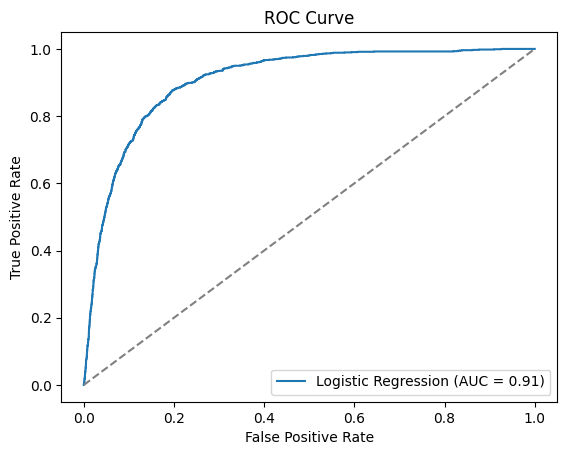

In [ ]:
# Step 1: Train a Logistic Regression model
balanced_log_reg = LogisticRegression(random_state=42, class_weight='balanced')
balanced_log_reg.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC and ROC curve)
y_pred_prob = balanced_log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class (1)

# Step 3: Compute ROC curve and find the optimal threshold
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)


# Optimal threshold: the one that maximizes the difference between true positive rate and false positive rate
optimal_threshold = thresholds[optimal_idx]

# Step 4: Make predictions using the optimal threshold
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Step 5: Calculate Precision, Recall, and F1 Score with the optimal threshold
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Step 6: Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Step 7: Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

#Step 8: Plot
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

In [ ]:
"""

After using the predicted probabilities to tune for the optimal model threshold ad addressing the class imbalance, I was able to
drastically increase performance on the Recall, even though the precision had a big decrease.  Again, since the Recall is what is
more important here, I am willing to take a decrease on the Precision of the model if that means we capture more potential
customers for the campaign.

"""

### 5.3 Build a KNN Model with k=5

Build a KNN model with k=5 and check the model performance using precision, recall, F1 score, write your observations on the metrics

In [ ]:
# Import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier

# Make the train and test sets are in array format
knn_train = X_train.to_numpy()
knn_test = X_test.to_numpy()

# Step 1: Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(knn_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_pred_prob = knn_model.predict_proba(knn_test)[:, 1]  # Probability of the positive class (1)

# Step 3: Make predictions using the default threshold (0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Step 4: Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 5: Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.60
Recall: 0.34
F1-Score: 0.43


In [ ]:
"""

This model did not perform well on recall or precision.  I will try applying SMOTE
to the data to address class imbalance.

"""

### 5.4 Build a KNN Model with k=5 with a balanced set

#####  SMOTE the data to address class imbalance and build a KNN model with k=5 and check the model performance using precision, recall, F1 score; Compare the reuslts with the previous results and write your observations.

In [ ]:
%%time
#Import modules
from imblearn.over_sampling import SMOTE

# Step 1: Apply SMOTE to the training data
smote = SMOTE(random_state=42)

# Resample X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Convert the resampled data to NumPy arrays (if they are not already)
X_train_smote, y_train_smote = X_train_resampled.to_numpy(), y_train_resampled.to_numpy()

# Step 2: Initialize and train the KNN model
balanced_knn_model = KNeighborsClassifier(n_neighbors=5)
balanced_knn_model.fit(knn_train, y_train)
balanced_knn_model = KNeighborsClassifier(n_neighbors = 5)
balanced_knn_model.fit(X_train_smote, y_train_smote)

# Step 3: Make predictions on the test set
y_pred = balanced_knn_model.predict(knn_test)

# Step 4: Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 5: Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.41
Recall: 0.73
F1-Score: 0.52
CPU times: user 6.28 s, sys: 192 ms, total: 6.47 s
Wall time: 6.9 s


In [ ]:
"""

After applying Synthetic minority Oversampling to the data, I was able to increase the overall performance.
While the precision did increase slightly, the recall had biggest increase, which is the metric we want
to see performance on the most for this problem.  It has not taken the top spot; however, it is a descent
recall with room for improvement.

"""

### 5.5 Build a Random forest model with n_estimators=10 and balanced class weight

#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the training set and test set metrics and write your observations.

In [ ]:
# Import required modules
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize and train the Random Forest model with n_estimators=10
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
random_forest_model.fit(X_train, y_train)


# Step 2: Make predictions on the training set
y_train_pred = random_forest_model.predict(X_train)


# Step 3: Make predictions on the test set
y_pred = random_forest_model.predict(X_test)


# Step 4: Calculate Precision, Recall, and F1 Score for the training set
rf_train_precision = precision_score(y_train, y_train_pred)
rf_train_recall = recall_score(y_train, y_train_pred)
rf_train_f1 = f1_score(y_train, y_train_pred)


# Step 5: Calculate Precision, Recall, and F1 Score for the test set
rf_test_precision = precision_score(y_test, y_pred)
rf_test_recall = recall_score(y_test, y_pred)
rf_test_f1 = f1_score(y_test, y_pred)


# Step 6: Print the evaluation metrics for the training set
print(f"Precision: {rf_train_precision:.2f}")
print(f"Recall: {rf_train_recall:.2f}")
print(f"F1-Score: {rf_train_f1:.2f} \n")


# Step 7: Print the evaluation metrics for the test set
print(f"Precision: {rf_test_precision:.2f}")
print(f"Recall: {rf_test_recall:.2f}")
print(f"F1-Score: {rf_test_f1:.2f}")

Precision: 1.00
Recall: 0.94
F1-Score: 0.97 

Precision: 0.63
Recall: 0.30
F1-Score: 0.41


In [ ]:
"""

Looking at the difference between the train and test scores, it is apparent that the model is overfitting to the training data.  I will need to apply some
regularization in order to prevent overfitting.  The overfitting must be due to the algo itself as opposed to the data because the model is applying balanced
weighting to the data with the class_weight = 'balanced' hyperparameter.  Furthermore, the precision is really high compared the Recall, which is opposite
of what we want to see for this problem.

"""

"\n\nLooking at the difference between the train and test scores, it is apprant that the model is overfitting to the training data.  I will need to apply some\nregularuzatin in order to prevent overfitting.  The overfitting must be due to the algo itself as opposed to the data because the model is applying balanced\nweighting to the data with the class_weight = 'balanced' hyperparameter.  Furthermore, the precision is really high compared the the Recall, which is opposite\nof what we want to see for this problem.\n\n"

### 5.6 Build a Random forest model with the following parameter grid and balanced class weight
##### param_grid:

```
'n_estimators': [100,200],          
'max_depth': [10,20,30],        
'min_samples_split': [2,5,10]
```



#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the test set metrics and compare it with the previous model results.

In [ ]:
%%time

# Import required modules
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100,200],          # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]         # Minimum samples required to split a node
}

# Step 2: Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# Step 4: Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 6: Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Step 7: Calculate Precision, Recall, and F1 Score for the best model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Step 8: Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.54
Recall: 0.70
F1-Score: 0.61
CPU times: user 8min 25s, sys: 1.3 s, total: 8min 26s
Wall time: 8min 32s


In [ ]:
"""

After running a grid search for the optimal combination of hyperparameters given the initial range,
the model did show improvement.  The recall score is bare minimum acceptable and the precision is
has dropped lower than it was before hyperparameter tuning and class balancing.

"""

### 5.7 Build a XGBoost model

#####  Build a default XGBoost model and check the model performance using precision, recall, F1 score for training and test sets; Give your comments .

In [ ]:
# Import required modules
import xgboost as xgb

# Step 1: Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)


# Step 3: Make predictions on the training set
y_train_pred = xgb_model.predict(X_train)


# Step 4: Make predictions on the test set
y_pred = xgb_model.predict(X_test)


# Step 5: Calculate Precision, Recall, and F1 Score for the training set
xgb_train_precision = precision_score(y_train, y_train_pred)
xgb_train_recall = recall_score(y_train, y_train_pred)
xgb_train_f1 = f1_score(y_train, y_train_pred)


# Step 6: Calculate Precision, Recall, and F1 Score for the test set
xgb_train_precision = precision_score(y_test, y_pred)
xgb_train_recall = recall_score(y_test, y_pred)
xgb_train_f1 = f1_score(y_test, y_pred)


# Step 7: Print the evaluation metrics for the training set
print(f"Precision: {rf_train_precision:.2f}")
print(f"Recall: {rf_train_recall:.2f}")
print(f"F1-Score: {rf_train_f1:.2f} \n")


# Step 8: Print the evaluation metrics for the test set
print(f"Precision: {rf_test_precision:.2f}")
print(f"Recall: {rf_test_recall:.2f}")
print(f"F1-Score: {rf_test_f1:.2f}")




Precision: 1.00
Recall: 0.94
F1-Score: 0.97 

Precision: 0.63
Recall: 0.30
F1-Score: 0.41


In [ ]:
"""

This model is overfitting the data during training.  Even though XG Boost is applying regularization, the classes need to be balanced to prevent overfitting.
The precision is really high compared the Recall, which is opposite of what we want to see for this problem.

"""

'\nThis model is overfitting the data during training.  Even though XG Boost is applying regularization, the classes need to be balanced to prevent overfitting.\nThe precision is really high compared the the Recall, which is opposite of what we want to see for this problem.\n\n'

### 5.8 XGBoost model with hyper parameter tuning

#####  Build a XGBoost model with the following parameter grid and check the model performance using precision, recall, F1 score on test set; Compare your result with the default XGBoost model .

#### Hyperparameter grid:
    - 'n_estimators': [50, 100, 200, 300],                 
    - 'learning_rate': [0.01, 0.1, 0.2, 0.3],              
    - 'max_depth': [None, 3, 5, 7, 10],                          
    - 'min_child_weight': [1, 3, 5],                      
    - 'subsample': [0.2, 0.6, 0.8, 1.0],                        
    - 'colsample_bytree': [0.6, 0.8, 1.0],                 
    - 'gamma': [0, 0.1, 0.3, 0.5]                          

In [ ]:
# Import required modules
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [None, 3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.2, 0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Step 2: Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Step 3: Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')


# Step 4: Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_


# Step 6: Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Step 7: Calculate Precision, Recall, and F1 Score for the best model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 8: Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.49
Recall: 0.80
F1-Score: 0.61


In [ ]:
"""

After hyperparameter tuning with the XGBoost model, the performance has improved on both the precision and recall
metrics.  The recall is at a pretty good level and the precision is in an acceptable range given the constraints
of the problem.

"""

### 5.9 XGBoost model with hyper parameter tuning and SMOTE

#####  Build a XGBoost model with the parameter grid given in the previous problem and also balance the dataset with SMOTE and check the model performance using precision, recall, F1 score on test set; Compare your result with previous XGboost models .

In [ ]:
# Import required modules

# Step 1: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)

# Resample X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Convert the resampled data to NumPy arrays (if they are not already)
X_train_smote, y_train_smote = X_train_resampled.to_numpy(), y_train_resampled.to_numpy()

# Step 2: Define the hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.2, 0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

# Step 3: Initialize the XGBoost model
xgb_SMOTE_model = xgb.XGBClassifier(random_state=42)

# Step 4: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_SMOTE_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')

# Step 5: Fit RandomizedSearchCV on the SMOTEd training data
random_search.fit(X_train_smote, y_train_smote)

# Step 6: Get the best parameters and best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_



# Step 7: Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)


# Step 8: Calculate Precision, Recall, and F1 Score for the best model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Step 9: Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Precision: 0.56
Recall: 0.68
F1-Score: 0.61


In [ ]:
"""

The precision increased lightly after applying SMOTE to balance the Target classes,
however, we got a reduction in recall, which is not what we want.  Not an ideal model.

"""

### 5.10 Best model selection

#####  Evaluate the test set performance of all 9 models and create horizontal bar plots for each individual metric to visualize the results effectively. Based on the plots and your analysis, select the top three models and provide your reasoning for the selection..

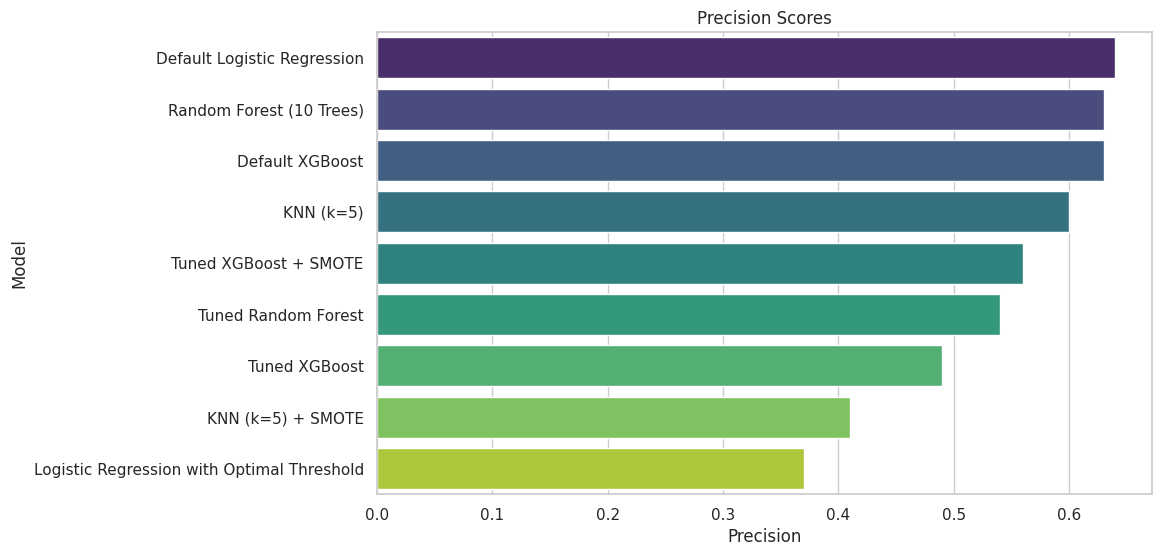

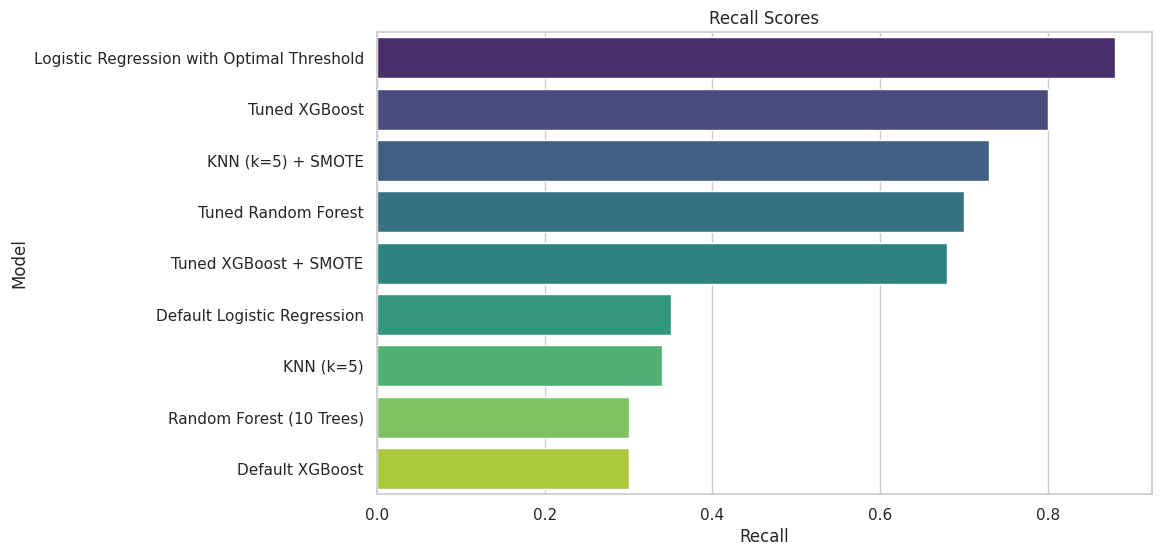

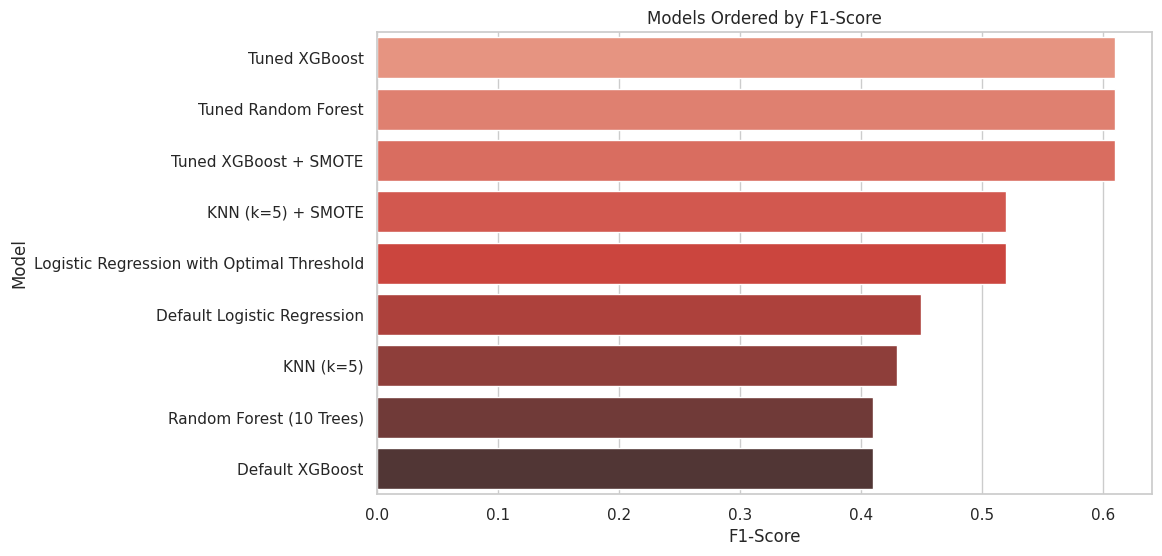

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Model names and their corresponding metrics (precision, recall, F1 score)
model_names = [
    "Default Logistic Regression", "Logistic Regression with Optimal Threshold",
    "KNN (k=5)", "KNN (k=5) + SMOTE", "Random Forest (10 Trees)",
    "Tuned Random Forest", "Default XGBoost", "Tuned XGBoost",
    "Tuned XGBoost + SMOTE"
]


# Get precision, recall, and F1 scores
precision_scores =[0.64, 0.37, 0.60, 0.41, 0.63, 0.54, 0.63, 0.49, 0.56]
recall_scores =[0.35, 0.88, 0.34, 0.73, 0.30, 0.70, 0.30, 0.80, 0.68]
f1_scores = [0.45, 0.52, 0.43, 0.52, 0.41, 0.61, 0.41, 0.61, 0.61]


# Creating a DataFrame for easier manipulation
df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})


# Sorting the DataFrame for each metric
df_precision_sorted = df.sort_values(by='Precision', ascending=False)
df_recall_sorted = df.sort_values(by='Recall', ascending=False)
df_f1_sorted = df.sort_values(by='F1-Score', ascending=False)


# Set style for plots
sns.set(style="whitegrid")


# Plot for Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Precision', y='Model', data=df_precision_sorted, palette="viridis", hue='Model', legend=False)
plt.title('Precision Scores')
plt.xlabel('Precision')
plt.ylabel('Model')
plt.show()

# Plot for Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Recall', y='Model', data=df_recall_sorted, palette="viridis", hue='Model', legend=False)
plt.title('Recall Scores')
plt.xlabel('Recall')
plt.ylabel('Model')
plt.show()

# Plot for F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(x="F1-Score", y="Model", data=df_f1_sorted, palette="Reds_d", hue='Model', legend=False)
plt.title("Models Ordered by F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.show()

